In [1]:
# Array manipulation
import numpy as np

# Visualize data
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Linear separable data

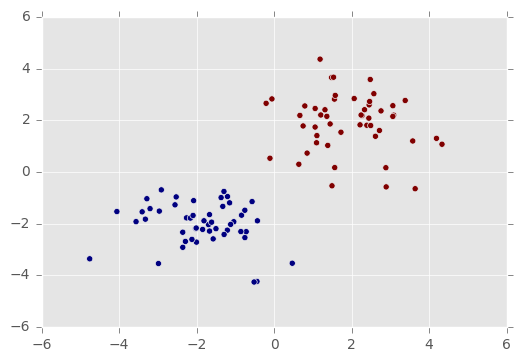

In [2]:
# Input data
N = 100
D = 2
X = np.random.randn(100, 2)

# Center points at specific locations
X[:50, :] -= 2 * np.ones([50, D])
X[50:, :] += 2 * np.ones([50, D])

# Create targets
T = np.array([0]*50 + [1]*50)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c = T)

# Construct the model (logistic regression)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def cross_entropy(T, Y):
    # If T = 0, fake_label = 1 - Y ; if T = 1, fake_label = Y
    fake_label = Y.copy()
    fake_label[T == 0] = 1 - fake_label[T == 0]    
  
    return -np.sum(np.log(fake_label))   

In [5]:
# Join bias with input
bias = np.ones([100, 1])
Xb = np.concatenate((bias, X), axis = 1)

# Create random weights
W = np.random.randn(D + 1)

In [6]:
# Calculate output
z = Xb.dot(W)
Y = sigmoid(z)

In [7]:
print('Cross entropy:', cross_entropy(T, Y))

Cross entropy: 19.1230252723


In [8]:
def visualize(W):
    x = np.arange(-4, 5.1, 0.1)
    y = np.arange(-6, 6.1, 0.1)
    xx, yy = np.meshgrid(x, y)

    ones = np.ones([np.product(xx.shape), 1])
    pred_area = np.concatenate((ones, np.c_[xx.ravel(), yy.ravel()]), axis = 1)

    pred = sigmoid(pred_area.dot(W))
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0

    pred = pred.reshape(xx.shape)

    # Plot decision boundaries
    plt.pcolormesh(xx, yy, pred, cmap = 'seismic')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c = T)

    plt.xlim(-4, 5)
    plt.ylim(-6, 6)
    plt.show()
    
    return

Training

Cross entropy: 19.1230252723


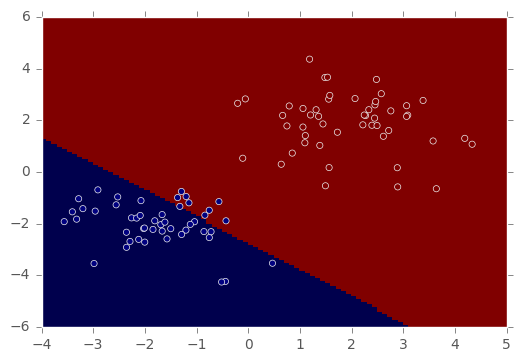

Cross entropy: 6.65637098232


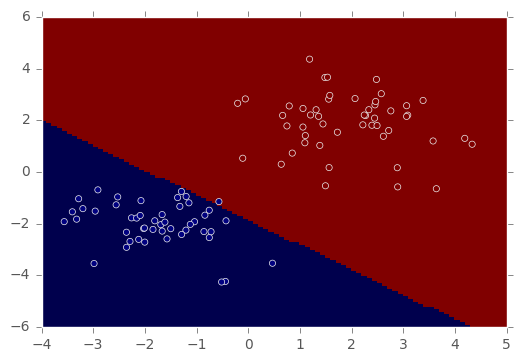

Cross entropy: 4.04294604012


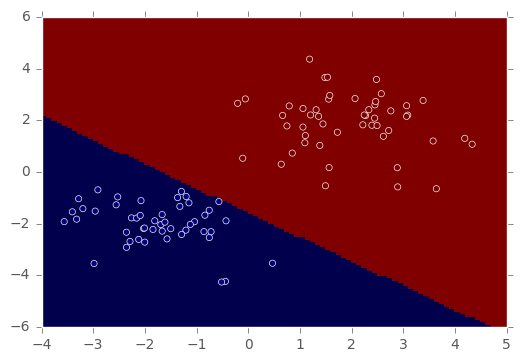

Cross entropy: 2.9090555521


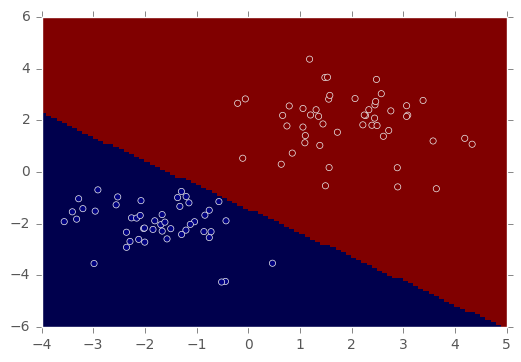

Cross entropy: 2.27561796157


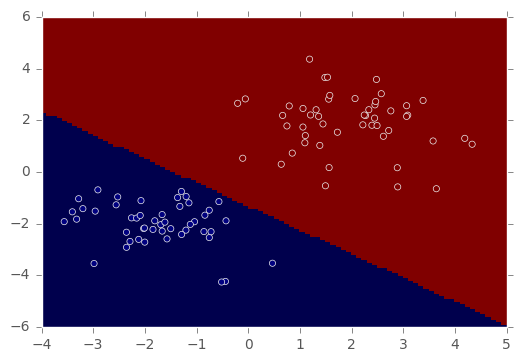

Cross entropy: 1.87140126955


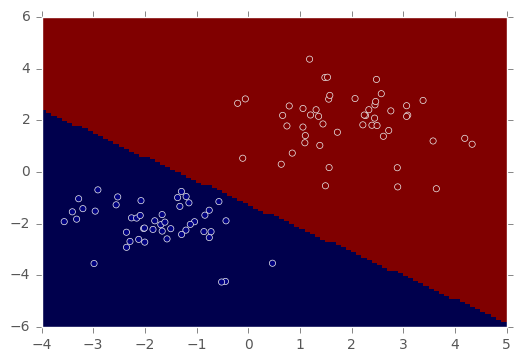

Cross entropy: 1.59115546845


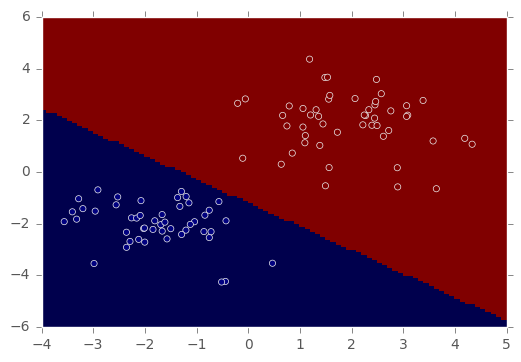

Cross entropy: 1.38548911534


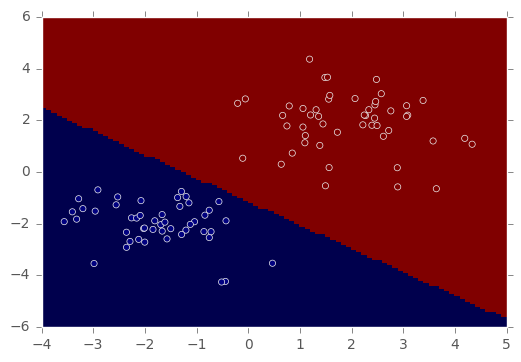

Cross entropy: 1.2281577161


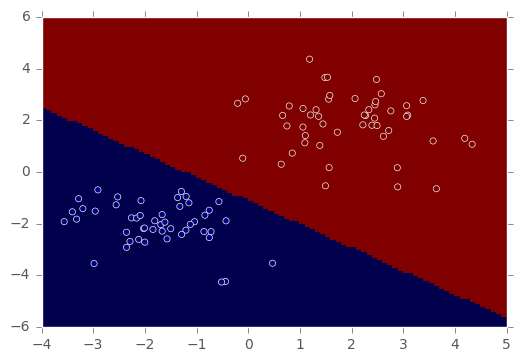

Cross entropy: 1.10392951377


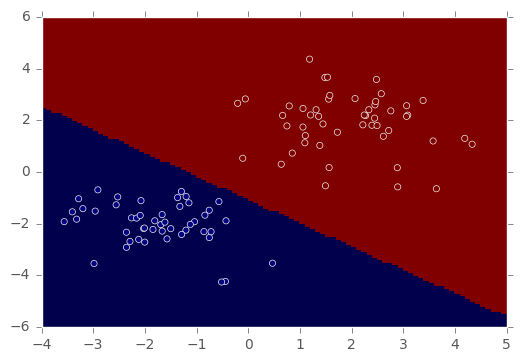

[ 2.67725865  2.16389794  2.39492381]


In [9]:
n_steps = 100
learning_rate = 0.003
regul_factor = 0.01

for step in range(n_steps):
    if step % 10 == 0:
        print('Cross entropy:', cross_entropy(T, Y))
        visualize(W)
    
    W -= learning_rate * ((Y - T).dot(Xb) - regul_factor * W)
    Y = sigmoid(Xb.dot(W))    
    
print(W)